# Importando as bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Data set é disponível no kaggle: https://www.kaggle.com/datasets/matarrgaye/revolut-spending-on-debit-cards

#### Relembrando conceitos de Estatística

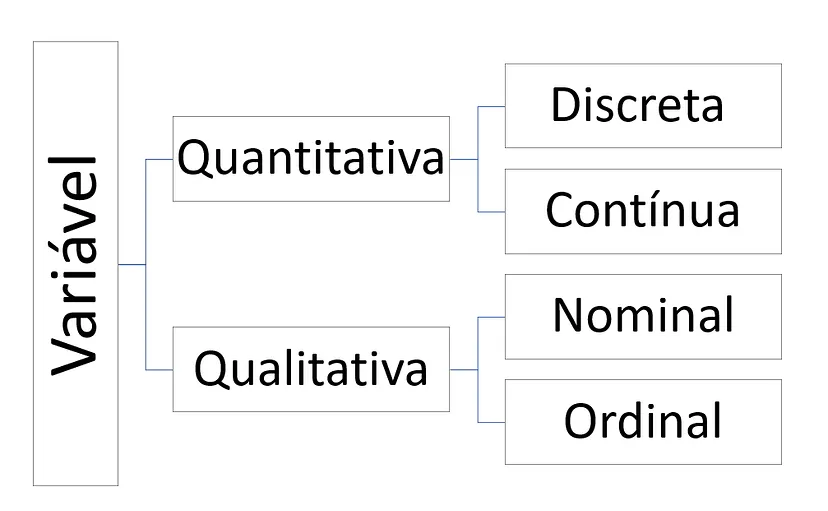

Nesse dataset só possuí variáveis quantitativas contínuas

# 1. Tratamento dos dados

Esse dataframe corresponde as despesas por setor, então cada coluna corresponde as desepesas de um setor, existem 6 setores, distribuídos em (combustível automotivo), (entretenimento), (comida e bebida), (bares, restaurantes e fastfood), (varejo), (viajem e acomodação). 

In [2]:
data = pd.read_excel('data.xlsx')

In [3]:
data.columns

Index(['Date', 'Total', 'Automotive Fuel', 'Entertainment', 'Food and Drink',
       'Pubs, restaurants, and fast food', 'Retail',
       'Travel and accommodation'],
      dtype='object')

In [4]:
# Denominados os novos valores das colunas

data.columns = ['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']

O Data set representa as despesas por setor 

In [5]:
data.head()

,Data,Total,Combustível Automotivo,Entretenimento,Comida e bebida,"Bares, Restaurantes e FastFood",Varejo,Viajem e acomodação
0,2020-01-01,113.90,125.01,113.52,101.79,119.09,119.98,106.45
1,2020-01-02,117.51,128.54,117.09,107.25,121.97,122.67,110.92
2,2020-01-03,117.63,132.20,115.70,107.47,122.00,121.45,112.93
3,2020-01-04,116.27,135.19,108.49,107.90,119.54,119.46,113.16
4,2020-01-05,113.75,135.02,99.38,107.01,113.30,118.46,112.29


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Data                            1251 non-null   datetime64[ns]
 1   Total                           1251 non-null   float64       
 2   Combustível Automotivo          1251 non-null   float64       
 3   Entretenimento                  1251 non-null   float64       
 4   Comida e bebida                 1251 non-null   float64       
 5   Bares, Restaurantes e FastFood  1251 non-null   float64       
 6   Varejo                          1251 non-null   float64       
 7   Viajem e acomodação             1251 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 78.3 KB


In [7]:
data.nunique().sort_values()

Comida e bebida                   1084
Bares, Restaurantes e FastFood    1159
Entretenimento                    1163
Viajem e acomodação               1172
Total                             1174
Combustível Automotivo            1177
Varejo                            1177
Data                              1251
dtype: int64

O Dataset possuí variáveis com valores na maioria únicos, é de se esperar pois são variáveis quantitativas contínuas. 

# 2. Definindo os anos 

In [8]:
# definindo um grupo por mês - Ano de 2020
mes1_2020 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[data['Data'] <= '2020-01-31']

mes2_2020 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2020-01-31') & (data['Data'] <= '2020-02-29')]

mes3_2020 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2020-02-29') & (data['Data'] <= '2020-03-31')]

mes4_2020 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2020-03-31') & (data['Data'] <= '2020-04-30')]

mes5_2020 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2020-04-30') & (data['Data'] <= '2020-05-31')]

mes6_2020 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2020-05-31') & (data['Data'] <= '2020-06-30')]

mes7_2020 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2020-06-30') & (data['Data'] <= '2020-07-31')]

mes8_2020 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2020-07-31') & (data['Data'] <= '2020-08-31')]

mes9_2020 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2020-08-31') & (data['Data'] <= '2020-09-30')]

mes10_2020 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2020-09-30') & (data['Data'] <= '2020-10-31')]

mes11_2020 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2020-10-31') & (data['Data'] <= '2020-11-30')]

mes12_2020 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2020-11-30') & (data['Data'] <= '2020-12-31')]

In [9]:
# definindo um grupo por mês - Ano de 2021
mes1_2021 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2020-12-31') & (data['Data'] <= '2021-01-31')]

mes2_2021 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2021-01-31') & (data['Data'] <= '2021-02-28')]

mes3_2021 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2021-02-28') & (data['Data'] <= '2021-03-31')]

mes4_2021 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2021-03-31') & (data['Data'] <= '2021-04-30')]

mes5_2021 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2021-04-30') & (data['Data'] <= '2021-05-31')]

mes6_2021 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2021-05-31') & (data['Data'] <= '2021-06-30')]

mes7_2021 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2021-06-30') & (data['Data'] <= '2021-07-31')]

mes8_2021 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2021-07-31') & (data['Data'] <= '2021-08-31')]

mes9_2021 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2021-08-31') & (data['Data'] <= '2021-09-30')]

mes10_2021 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2021-09-30') & (data['Data'] <= '2021-10-31')]

mes11_2021 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2021-10-31') & (data['Data'] <= '2021-11-30')]

mes12_2021 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2021-11-30') & (data['Data'] <= '2021-12-31')]

In [10]:
# definindo um grupo por mês - Ano de 2022
mes1_2022 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2021-12-31') & (data['Data'] <= '2022-01-31')]

mes2_2022 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2022-01-31') & (data['Data'] <= '2022-02-28')]

mes3_2022 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2022-02-28') & (data['Data'] <= '2022-03-31')]

mes4_2022 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2022-03-31') & (data['Data'] <= '2022-04-30')]

mes5_2022 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2022-04-30') & (data['Data'] <= '2022-05-31')]

mes6_2022 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2022-05-31') & (data['Data'] <= '2022-06-30')]

mes7_2022 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2022-06-30') & (data['Data'] <= '2022-07-31')]

mes8_2022 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2022-07-31') & (data['Data'] <= '2022-08-31')]

mes9_2022 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2022-08-31') & (data['Data'] <= '2022-09-30')]

mes10_2022 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2022-09-30') & (data['Data'] <= '2022-10-31')]

mes11_2022 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2022-10-31') & (data['Data'] <= '2022-11-30')]

mes12_2022 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2022-11-30') & (data['Data'] <= '2022-12-31')]

In [11]:
# definindo um grupo por mês - Ano de 2023
mes1_2023 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2022-12-31') & (data['Data'] <= '2023-01-31')]

mes2_2023 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2023-01-31') & (data['Data'] <= '2023-02-28')]

mes3_2023 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2023-02-28') & (data['Data'] <= '2023-03-31')]

mes4_2023 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2023-03-31') & (data['Data'] <= '2023-04-30')]

mes5_2023 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2023-04-30') & (data['Data'] <= '2023-05-31')]

mes6_2023 = data[['Data', 'Total', 'Combustível Automotivo', 'Entretenimento', 'Comida e bebida',
       'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']].loc[(data['Data'] > '2023-05-31') & (data['Data'] <= '2023-06-30')]

In [12]:
# Transformando listas em dataframe

anos_2020 = pd.concat([mes1_2020, mes2_2020, mes3_2020, mes4_2020, mes5_2020, mes6_2020, mes7_2020, mes8_2020, mes9_2020, mes10_2020, mes11_2020, mes12_2020])
anos_2021 = pd.concat([mes1_2021, mes2_2021, mes3_2021, mes4_2021, mes5_2021, mes6_2021, mes7_2021, mes8_2021, mes9_2021, mes10_2021, mes11_2021, mes12_2021])
anos_2022 = pd.concat([mes1_2022, mes2_2022, mes3_2022, mes4_2022, mes5_2022, mes6_2022, mes7_2022, mes8_2022, mes9_2022, mes10_2022, mes11_2022, mes12_2022])
anos_2023 = pd.concat([mes1_2023, mes2_2023, mes3_2023, mes4_2023, mes5_2023, mes6_2023])

São 4 dataframes, anos de 2020, 2021, 2022 e 2023.

# 3. Data Visualization 

In [13]:
# Calculando os valores máximos e mínimos para cada ano de cada variável

print('-----------------------ANO 2020----------------------------')
print('VALORES MÁXIMO')
print('')
print(anos_2020.max())
print('')
print('VALORES MÍNIMO')
print('')
print(anos_2020.min())
print('-----------------------------------------------------------')

print('')
print('-----------------------ANO 2021----------------------------')
print('VALORES MÁXIMO')
print('')
print(anos_2021.max())
print('')
print('VALORES MÍNIMO')
print('')
print(anos_2021.min())
print('-----------------------------------------------------------')

print('')
print('-----------------------ANO 2022----------------------------')
print('VALORES MÁXIMO')
print('')
print(anos_2022.max())
print('')
print('VALORES MÍNIMO')
print('')
print(anos_2022.min())
print('-----------------------------------------------------------')

print('')
print('-----------------------ANO 2023----------------------------')
print('VALORES MÁXIMO')
print('')
print(anos_2023.max())
print('')
print('VALORES MÍNIMO')
print('')
print(anos_2023.min())
print('-----------------------------------------------------------')

-----------------------ANO 2020----------------------------
VALORES MÁXIMO

Data                              2020-12-31 00:00:00
Total                                          117.63
Combustível Automotivo                          158.9
Entretenimento                                 127.96
Comida e bebida                                151.78
Bares, Restaurantes e FastFood                  122.0
Varejo                                         162.96
Viajem e acomodação                            117.66
dtype: object

VALORES MÍNIMO

Data                              2020-01-01 00:00:00
Total                                           36.92
Combustível Automotivo                          40.16
Entretenimento                                   5.95
Comida e bebida                                 88.97
Bares, Restaurantes e FastFood                    7.9
Varejo                                          55.79
Viajem e acomodação                               5.7
dtype: object
---------------

##### Mapa de calor para identificar uma correalação

Mas é importantante deixar claro que uma boa correlação não indica necessariamente uma boa causalidade. 

<AxesSubplot:>

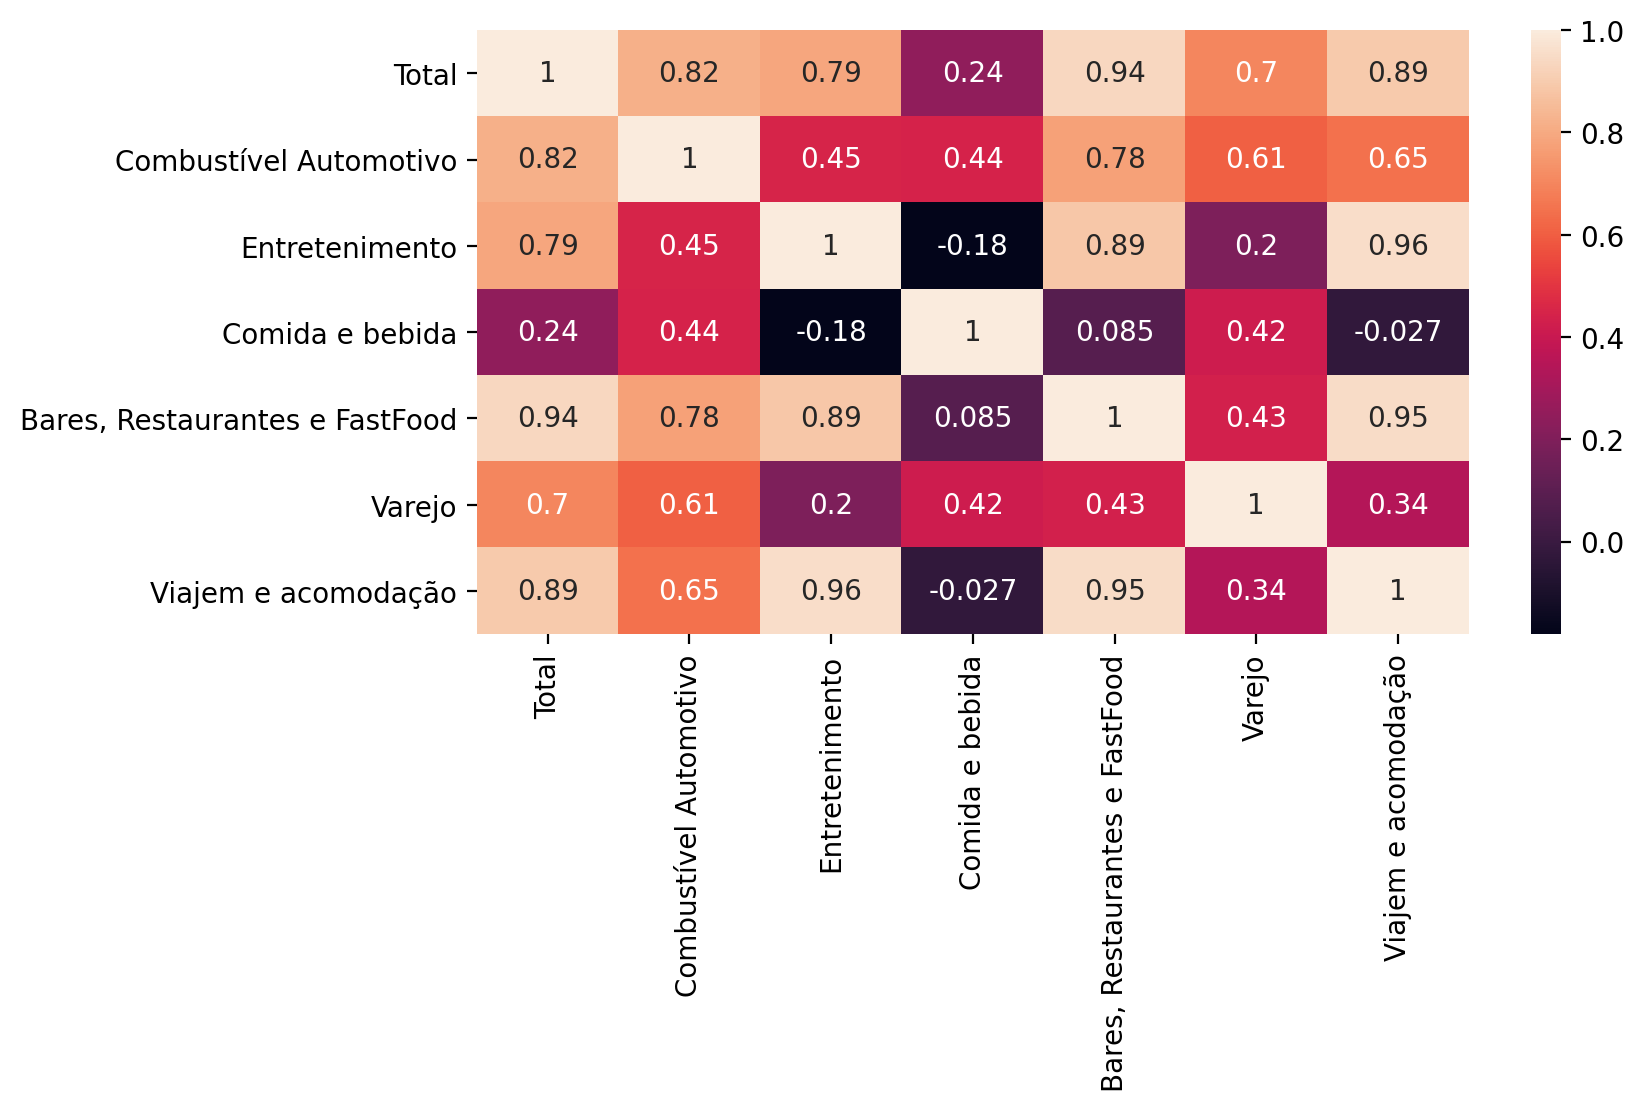

In [14]:
plt.figure(figsize=(8,4), dpi=200)

sns.heatmap(anos_2020.corr(), annot=True)

- Boas correlações:
    - Entretenimento, viajem e acomodação: 96%
    - Combustivel automotivo, bares, restaurantes e fastfood: 78% 
    - Entretenimento, bares, restaurantes e fastfood: 89%
    - Bares, restaurantes e fastfood, viajem e acomodação: 95%
    <br><br/>

- Correlações negativas:
    - Não existem relações negativas com altos valores de correlação.
    <br><br/>
    
- Correlação curiosa:
    - A correalação entre comida e bebida com bares, restaurantes e fastfood é de apenas 8,5%, apesar de estarem relacionados com o setor de comida. 
    <br><br/>
    
Porém, é necessário criar uma observação, não necessariamente duas variáveis possuem boas correlações que ambas possuem relação de causalidade. 

###### 3.1. Gráfico de densidade 

- Serve para visualizar a distribuição de uma variável numérica 

O gráfico de densidade é um tipo de gráfico que é igual ao histograma mas de forma contínua e suavizada a partir dos dados, demonstra a distribuição dos valores no gráfico em relação a sua frequência.

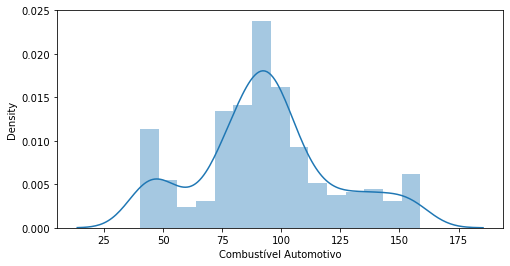

In [15]:
## Plotando um gráfico de densidade para prever uma talvez distribuição normal
## Essa distribuição é do ano de 2020

plt.figure(figsize=(8,4))

sns.distplot(anos_2020['Combustível Automotivo'])

plt.show()

- A cima pode-se perceber uma distribuição normal de despesas relacionadas a combustíveis automotivos durante o ano de 2020

In [16]:
soma_combustivel_carro = [mes1_2020['Combustível Automotivo'].sum(), mes2_2020['Combustível Automotivo'].sum(), mes3_2020['Combustível Automotivo'].sum(), mes4_2020['Combustível Automotivo'].sum(), mes5_2020['Combustível Automotivo'].sum(), mes6_2020['Combustível Automotivo'].sum(), mes7_2020['Combustível Automotivo'].sum(), mes8_2020['Combustível Automotivo'].sum(), mes9_2020['Combustível Automotivo'].sum(), mes10_2020['Combustível Automotivo'].sum(), mes11_2020['Combustível Automotivo'].sum(), mes12_2020['Combustível Automotivo'].sum()]

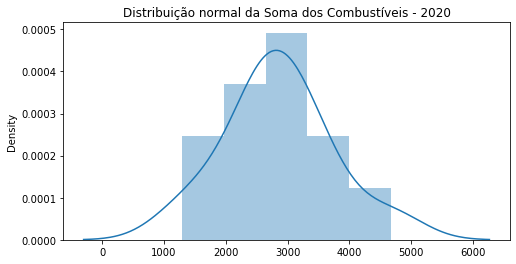

In [17]:
## Plotando um gráfico de densidade para prever uma talvez distribuição normal
## Essa distribuição é da soma das despesas em combustíveis de automóveis

plt.figure(figsize=(8,4))

sns.distplot(soma_combustivel_carro)

plt.title('Distribuição normal da Soma dos Combustíveis - 2020')
plt.show()

A soma das despesas com combustíveis automotivos por mês e a sua distribuição em um gráfico de densidade promove uma curva de densidade normal. 

###### 3.2. Curva de densidade das variáveis

#### Anos 2020 - Dataframe

- Curva de densidade das variáveis

In [20]:
anos_2020.head()

,Data,Total,Combustível Automotivo,Entretenimento,Comida e bebida,"Bares, Restaurantes e FastFood",Varejo,Viajem e acomodação
0,2020-01-01,113.90,125.01,113.52,101.79,119.09,119.98,106.45
1,2020-01-02,117.51,128.54,117.09,107.25,121.97,122.67,110.92
2,2020-01-03,117.63,132.20,115.70,107.47,122.00,121.45,112.93
3,2020-01-04,116.27,135.19,108.49,107.90,119.54,119.46,113.16
4,2020-01-05,113.75,135.02,99.38,107.01,113.30,118.46,112.29


In [21]:
anos_2020.columns

features2020 = ['Combustível Automotivo', 'Entretenimento',
       'Comida e bebida', 'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']

list(enumerate(features2020)) # Essa função enumerate irá retornar uma tuple com o nome da feature e um index relacionado a ela

[(0, 'Combustível Automotivo'),
 (1, 'Entretenimento'),
 (2, 'Comida e bebida'),
 (3, 'Bares, Restaurantes e FastFood'),
 (4, 'Varejo'),
 (5, 'Viajem e acomodação')]

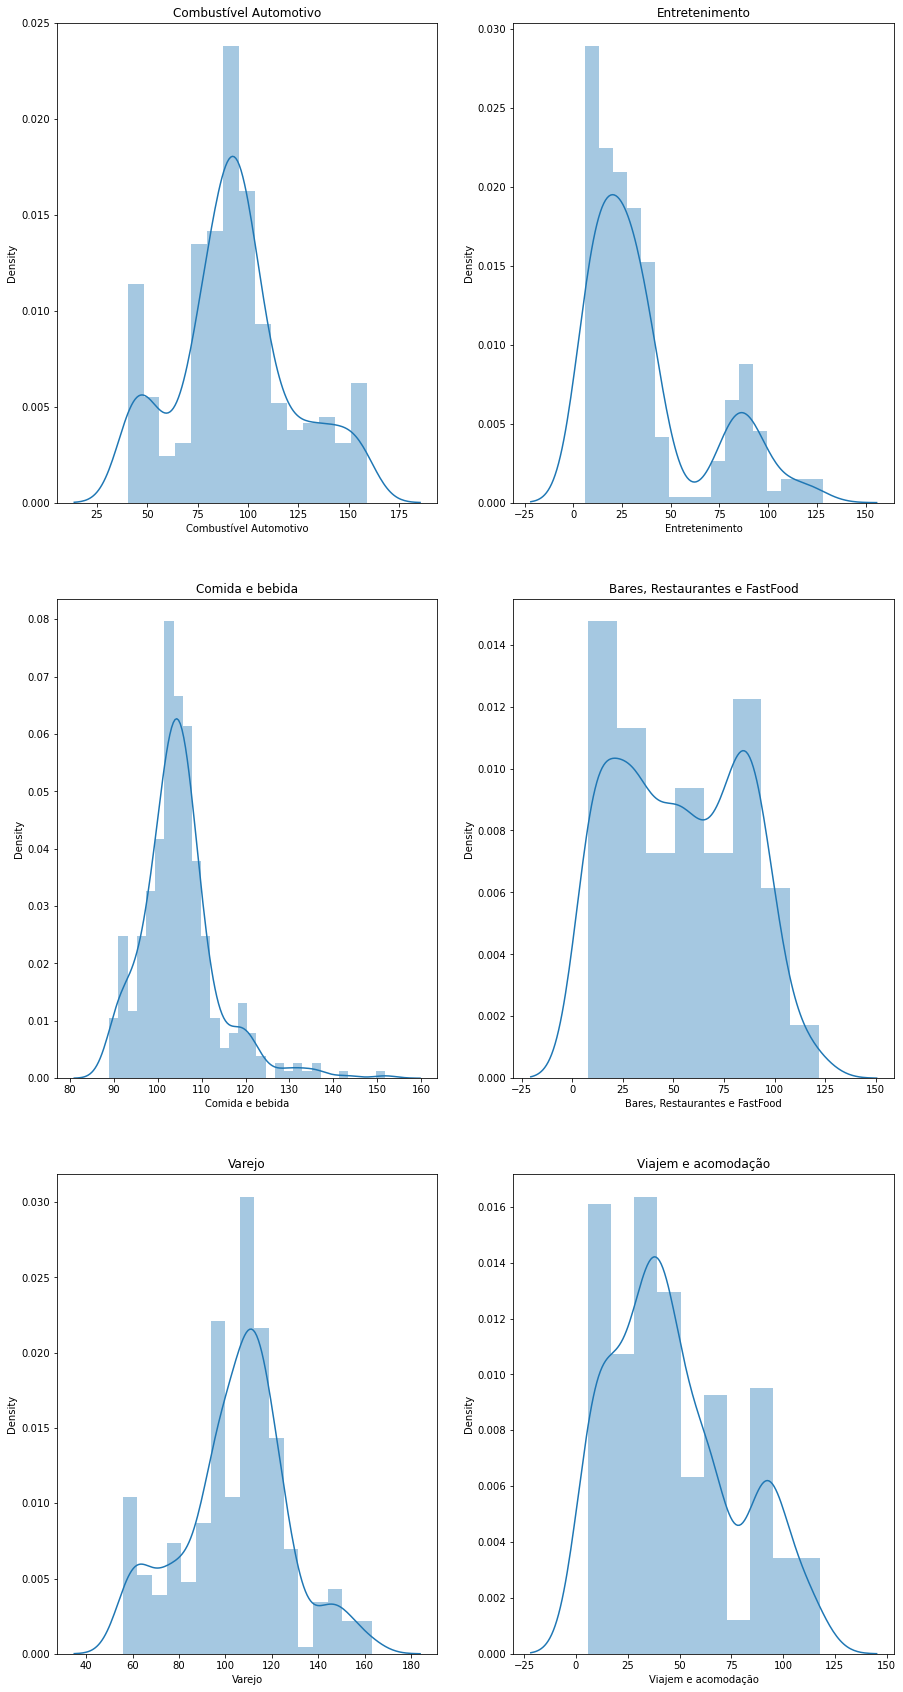

In [22]:
plt.figure(figsize=(15,30))

for item in enumerate(features2020):
    plt.subplot(3, 2, item[0]+1) # Esse +1 é para ir ao próximo plot
    sns.distplot(anos_2020[item[1]])
    plt.title(item[1])

Pode-se observar que alguns gráficos tem características parecidas, mas não iguais com uma distribuição normal. 
- Combustível Automotivo
- Comida e Bebida
- Varejo

###### Anos 2021 - DataFrame

- Curva de densidade das variáveis

In [23]:
anos_2021.head()

,Data,Total,Combustível Automotivo,Entretenimento,Comida e bebida,"Bares, Restaurantes e FastFood",Varejo,Viajem e acomodação
366,2021-01-01,67.73,80.89,17.76,98.82,31.42,107.90,34.58
367,2021-01-02,69.56,83.30,17.89,105.75,32.46,109.04,35.13
368,2021-01-03,69.36,83.72,17.83,106.05,32.22,108.70,34.73
369,2021-01-04,69.97,83.45,17.59,105.75,31.19,111.46,34.76
370,2021-01-05,68.67,82.11,16.23,103.93,30.01,110.24,33.63


In [24]:
features2021 = ['Combustível Automotivo', 'Entretenimento',
       'Comida e bebida', 'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']

list(enumerate(features2021))

[(0, 'Combustível Automotivo'),
 (1, 'Entretenimento'),
 (2, 'Comida e bebida'),
 (3, 'Bares, Restaurantes e FastFood'),
 (4, 'Varejo'),
 (5, 'Viajem e acomodação')]

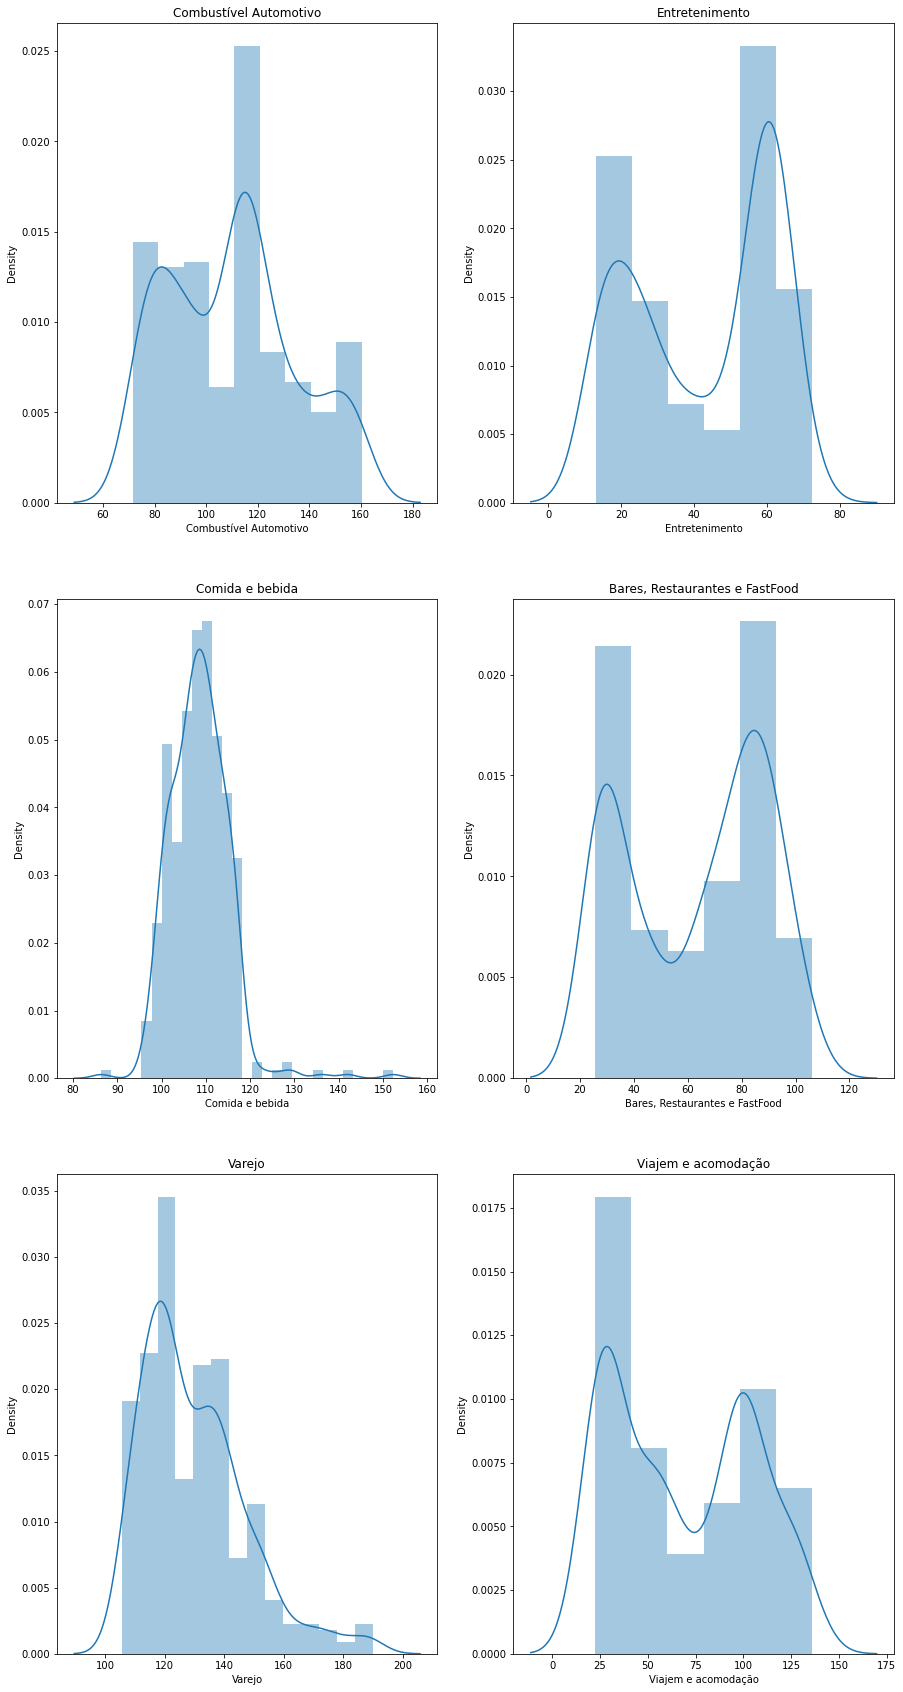

In [25]:
plt.figure(figsize=(15,30))

for item in enumerate(features2021):
    plt.subplot(3, 2, item[0]+1)
    sns.distplot(anos_2021[item[1]])
    plt.title(item[1])

Comentário sobre a visualização dos dados acima: 
- Alguns gráficos possuem características parecidas com distribuição normal, mas não são fidedignas o suficiente. 

- Comida e bebida tem as melhores características

###### Anos 2022 - DataFrame 

- Curva de densidade das variáveis

In [26]:
anos_2022.head()

,Data,Total,Combustível Automotivo,Entretenimento,Comida e bebida,"Bares, Restaurantes e FastFood",Varejo,Viajem e acomodação
731,2022-01-01,109.46,117.46,63.29,107.24,80.55,139.15,106.23
732,2022-01-02,111.59,121.12,64.21,111.49,82.92,139.57,109.29
733,2022-01-03,111.06,121.88,62.25,112.35,81.46,138.50,109.74
734,2022-01-04,110.23,121.61,59.44,111.63,77.95,139.66,109.03
735,2022-01-05,108.56,120.25,56.43,109.75,74.02,138.16,109.85


In [27]:
features2022 = ['Combustível Automotivo', 'Entretenimento',
       'Comida e bebida', 'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']

list(enumerate(features2022))

[(0, 'Combustível Automotivo'),
 (1, 'Entretenimento'),
 (2, 'Comida e bebida'),
 (3, 'Bares, Restaurantes e FastFood'),
 (4, 'Varejo'),
 (5, 'Viajem e acomodação')]

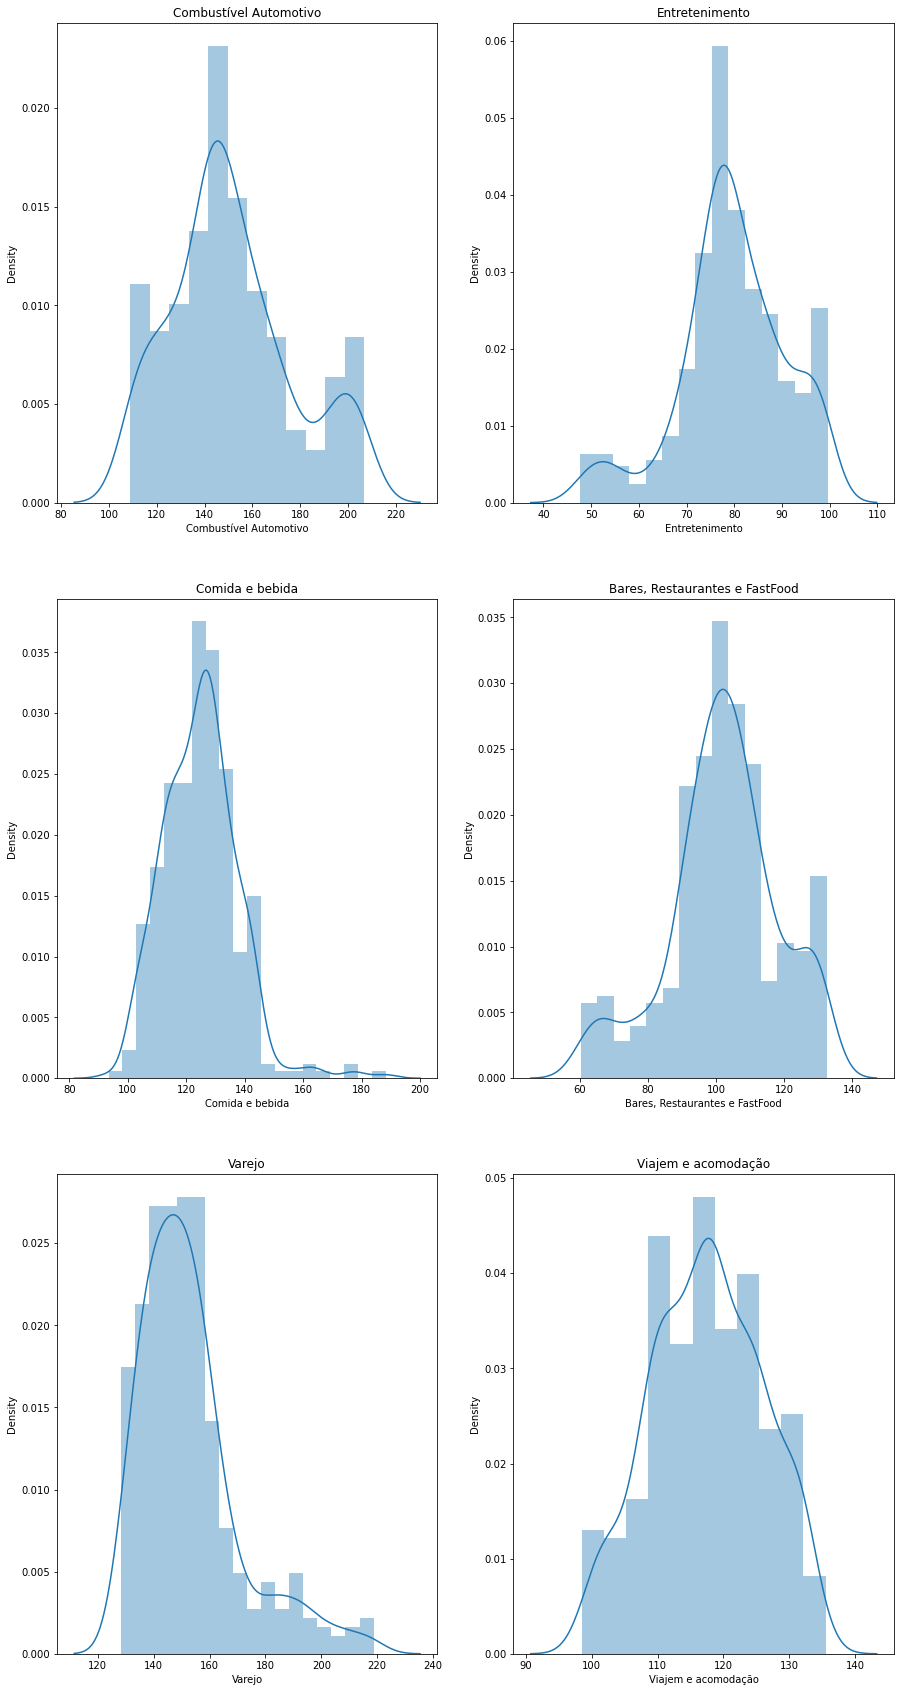

In [28]:
plt.figure(figsize=(15,30))

for item in enumerate(features2022):
    plt.subplot(3, 2, item[0]+1)
    sns.distplot(anos_2022[item[1]])
    plt.title(item[1])

Descrevendo os gráficos:

- Seguindo a lógica anterior, a maioria dos gráficos não possuem características de uma curva normal, o mais parecido a uma curva é comida e bebida. 

###### Anos 2023 - DataFrame

- Curva de densidade das variáveis

In [29]:
anos_2023.head()

,Data,Total,Combustível Automotivo,Entretenimento,Comida e bebida,"Bares, Restaurantes e FastFood",Varejo,Viajem e acomodação
1096,2023-01-01,141.22,163.87,101.99,139.24,120.76,171.21,124.20
1097,2023-01-02,144.43,168.85,103.13,145.71,122.36,172.90,129.34
1098,2023-01-03,144.36,169.19,100.83,145.94,118.76,174.59,130.60
1099,2023-01-04,142.17,167.22,96.63,144.61,113.92,173.06,129.93
1100,2023-01-05,138.92,164.88,92.23,142.02,108.05,170.44,128.16


In [30]:
features2023 = ['Combustível Automotivo', 'Entretenimento',
       'Comida e bebida', 'Bares, Restaurantes e FastFood', 'Varejo',
       'Viajem e acomodação']

list(enumerate(features2023))

[(0, 'Combustível Automotivo'),
 (1, 'Entretenimento'),
 (2, 'Comida e bebida'),
 (3, 'Bares, Restaurantes e FastFood'),
 (4, 'Varejo'),
 (5, 'Viajem e acomodação')]

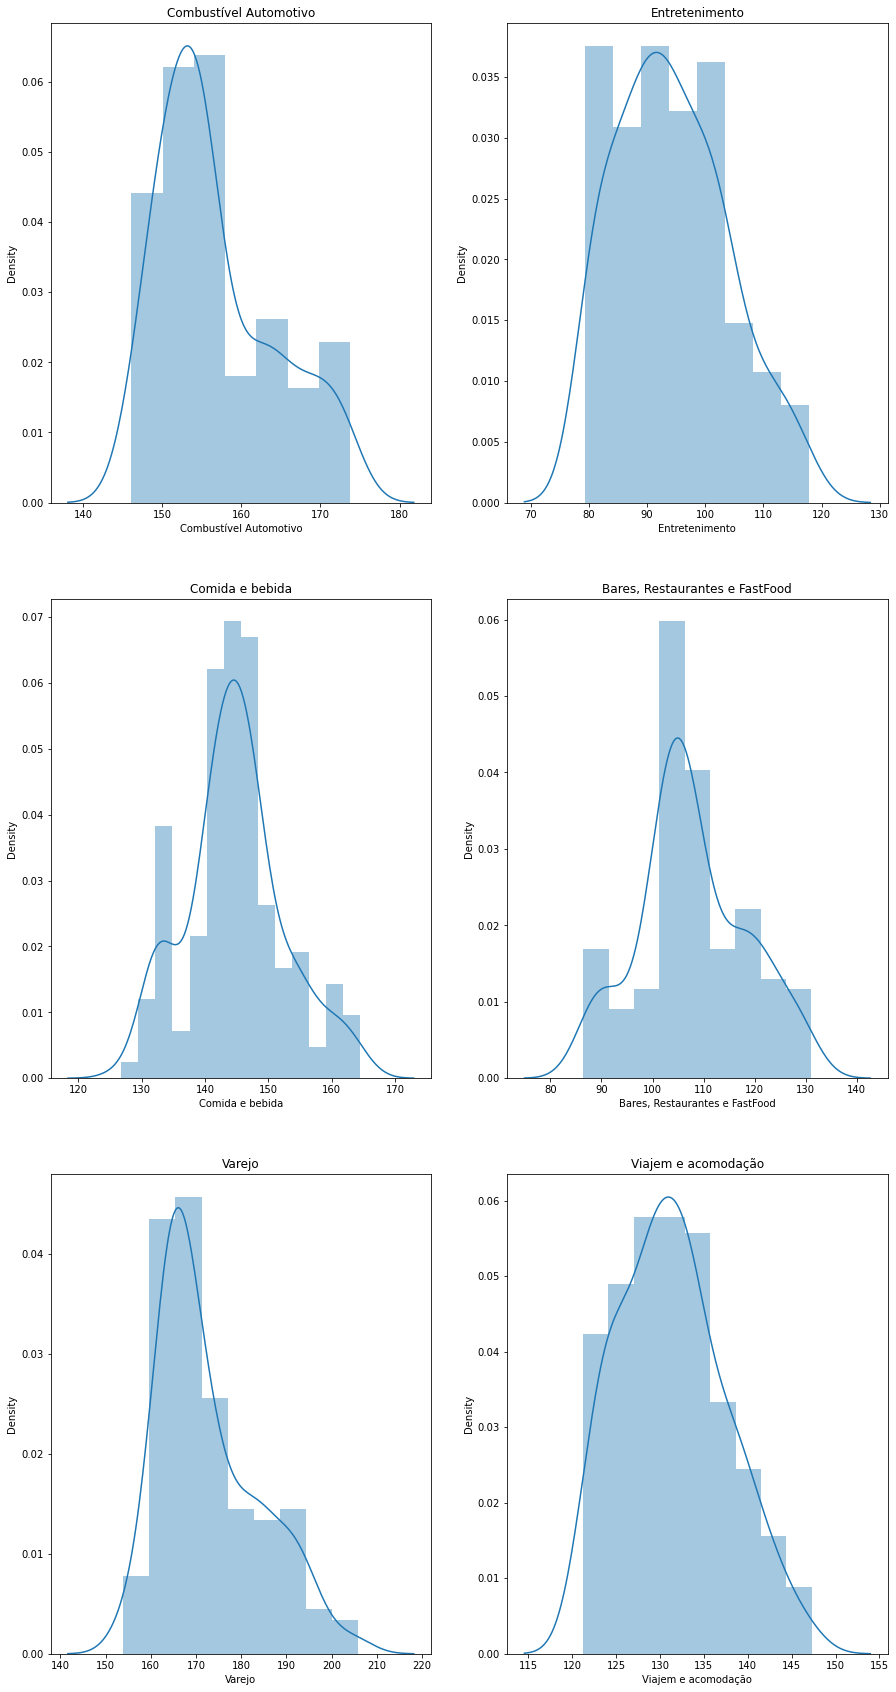

In [31]:
plt.figure(figsize=(15, 30))

for item in enumerate(features2023):
    plt.subplot(3,2, item[0]+1)
    sns.distplot(anos_2023[item[1]])
    plt.title(item[1])

Descrevendo gráficos
- Alguns gráficos possuem características parecidas com a distribuição normal, mas não é fidedígna.
- Os gráficos: Comida e bebida, Viajem e acomodação

###### 3.3. Continuando a análise exploratória

In [40]:
total_2020_combustivel = anos_2020['Combustível Automotivo'].sum()
total_2021_combustivel = anos_2021['Combustível Automotivo'].sum()
total_2022_combustivel = anos_2022['Combustível Automotivo'].sum()
total_2023_combustivel = anos_2023['Combustível Automotivo'].sum()

total_2020_entretenimento = anos_2020['Entretenimento'].sum()
total_2021_entretenimento = anos_2021['Entretenimento'].sum()
total_2022_entretenimento = anos_2022['Entretenimento'].sum()
total_2023_entretenimento = anos_2023['Entretenimento'].sum()

total_2020_comida = anos_2020['Comida e bebida'].sum()
total_2021_comida = anos_2021['Comida e bebida'].sum()
total_2022_comida = anos_2022['Comida e bebida'].sum()
total_2023_comida = anos_2023['Comida e bebida'].sum()

total_2020_bares = anos_2020['Bares, Restaurantes e FastFood'].sum()
total_2021_bares = anos_2021['Bares, Restaurantes e FastFood'].sum()
total_2022_bares = anos_2022['Bares, Restaurantes e FastFood'].sum()
total_2023_bares = anos_2023['Bares, Restaurantes e FastFood'].sum()

total_2020_varejo = anos_2020['Varejo'].sum()
total_2021_varejo = anos_2021['Varejo'].sum()
total_2022_varejo = anos_2022['Varejo'].sum()
total_2023_varejo = anos_2023['Varejo'].sum()

total_2020_viajem = anos_2020['Viajem e acomodação'].sum()
total_2021_viajem = anos_2021['Viajem e acomodação'].sum()
total_2022_viajem = anos_2022['Viajem e acomodação'].sum()
total_2023_viajem = anos_2023['Viajem e acomodação'].sum()

In [76]:
data_combustivel = [total_2020_combustivel, total_2021_combustivel, total_2022_combustivel, total_2023_combustivel]

data_entretenimento = [total_2020_entretenimento, total_2021_entretenimento, total_2022_entretenimento, total_2023_entretenimento]

data_comida = [total_2020_comida, total_2021_comida, total_2022_comida, total_2023_comida]

data_bares = [total_2020_bares, total_2021_bares, total_2022_bares, total_2023_bares]

data_varejo = [total_2020_varejo, total_2021_varejo, total_2022_varejo, total_2023_varejo]

data_viajem = [total_2020_viajem, total_2021_viajem, total_2022_viajem, total_2023_viajem]

labels = ['2020', '2021', '2022', '2023']

In [53]:
data.head()

,Data,Total,Combustível Automotivo,Entretenimento,Comida e bebida,"Bares, Restaurantes e FastFood",Varejo,Viajem e acomodação
0,2020-01-01,113.90,125.01,113.52,101.79,119.09,119.98,106.45
1,2020-01-02,117.51,128.54,117.09,107.25,121.97,122.67,110.92
2,2020-01-03,117.63,132.20,115.70,107.47,122.00,121.45,112.93
3,2020-01-04,116.27,135.19,108.49,107.90,119.54,119.46,113.16
4,2020-01-05,113.75,135.02,99.38,107.01,113.30,118.46,112.29


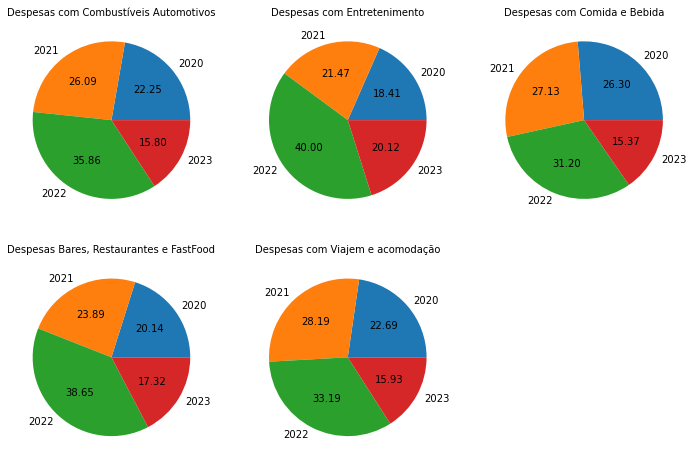

In [64]:
# Análise das despesas dos combustíveis 2020-2023
plt.rcParams["figure.figsize"] = [12,8]

plt.subplot(2,3,1)
plt.pie(data_combustivel, labels=labels, autopct='%.2f')
plt.title('Despesas com Combustíveis Automotivos', fontsize=10)

plt.subplot(2,3,2)
plt.pie(data_entretenimento, labels=labels, autopct='%.2f')
plt.title('Despesas com Entretenimento', fontsize=10)

plt.subplot(2,3,3)
plt.pie(data_comida, labels=labels, autopct='%.2f')
plt.title('Despesas com Comida e Bebida', fontsize=10)

plt.subplot(2,3,4)
plt.pie(data_bares, labels=labels, autopct='%.2f')
plt.title('Despesas Bares, Restaurantes e FastFood', fontsize=10)

plt.subplot(2,3,5)
plt.pie(data_varejo, labels=labels, autopct='%.2f')
plt.title('Despesas com Viajem e acomodação', fontsize=10)

plt.show()

###### Interpretração dos gráficos 

- Soma das despesas dos usuários do cartão de crédito com Combustíveis automotivos:
    - O ano que obteve a maior despesa com combustíveis automotivo dos usuários do cartão de crédito estão concentradas no     ano de 2022 com (55.154,92), em 2021 (40.134,81), em 2020 (34.231,13) e em 2023 (24.302,07). 
    <br><br/>
    
- Soma das despesas dos usuários do cartão de crédito com Entretenimento:
    - O ano com maior despesas dos usuários do cartão de crédito com Entretenimento foi em 2022 com (29.044,36), em 2021 com (15.593,84), em 2023 com (14.613,18) e em 2020 com (13.365,39). 
    <br><br/>

- Soma das despesas dos usuários do cartão de crédito com Comida e bebida:
    - O ano com maior despesas dos usuários do cartão de crédito com Comida e Bebida foi em 2022 com (45.565,97), em 2021 com (39.618,06), em 2020 com (38.404,09) e em 2023 com (22.437,32).
    <br><br/>
    
- Soma das despesas dos usuários do cartão de crédito com Bares, Restaurantes e FastFood: 
    - O ano com maior despesas dos usuários do cartão de crédito com Bares, Restaurantes e FastFood foi em 2022 com (37.293,02), em 2021 com (23.044,32), em 2020 com (19.430,47) e em 2023 com (16.709,67). 
    <br><br/>
    
- Soma das despesas dos usuários do cartão de crédito com Varejo: 
    - O ano com maior despesas dos usuários do cartão de crédito com Varejo foi em 2022 com (55.792,04), em 2021 com (47.391,64), em 2020 com (38.153,81) e em 2023 com (26.785,34). 
    <br><br/>
    
- Soma das despesas dos usuários do cartão de crédito com Viajem e acomodação: 
    - O ano com maior despesas dos usuários do cartão de crédito com Viajem e acomodação foi em 2022 com (42.898,48), em 2021 com (25.062,23), em 2023 com (20.362,9) e em 2020 com (17.237,06). 
    <br><br/>
    
OBS: É necessário salientar que quanto maior a despesa dos usuários maior é a utilização do cartão de crédito. E se aumenta a utilização do cartão de crédito, é provável que a empresa possa lucrar mais com juros e taxas de valores
Mas, é necessário salientar que os valores de 2023 só estão completos até junho, então é provável que iria ultrapassar os valores dos anos anteriores, seguindo uma tendência de crescimento em despesas/ utilização do cartão de crédito pelos usuários para pagar as contas.

###### 3.4.  Gráficos para Variáveis Qualitativas

- Alguns dataframes que utilizam variáveis qualitativas podem utilizar gráficos de pizza e barras.
- Nesse caso esse dataframe não possuem variáveis qualitativas. 